<a href="https://colab.research.google.com/github/kapitalistka/SberSchoolGroupProject/blob/main/Masloed_attempt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/c/ieee-fraud-detection/

Детекция мошеннических операций. Предсказание мошенничества крайне актуальная задача в современных финансовых организациях. Обратите внимание на несбалансированность классов. Это может стать большой проблемой при решении.


Categorical Features 
- Transaction
- ProductCD
-card1 
- card6
-addr1, addr2
-P_emaildomain
-R_emaildomain
-M1 - M9


Categorical Features 
- Identity
-DeviceType
-DeviceInfo
-id_12 - id_38


The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp).

## Загружаем данные с Kaggle

In [ ]:
#!pip install kaggle
from google.colab import files
from google.colab import drive
from zipfile import ZipFile
from google.colab import files

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

drive.mount('/content/gdrive')
pd.options.display.float_format = "{:,.2f}".format


def update_kaggle_token():
  uploaded = files.upload()

  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
  
  # Then move kaggle.json into the folder where the API expects to find it.
  !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

update_kaggle_token()

%cd /
%cd /content
!mkdir -p kaggle/GP2/
%cd kaggle/GP2
!kaggle competitions download -c ieee-fraud-detection
%cd /content


Mounted at /content/gdrive


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes
/
/content
/content/kaggle/GP2
 89% 52.0M/58.3M [00:00<00:00, 111MB/s] 
100% 58.3M/58.3M [00:00<00:00, 168MB/s]
  0% 0.00/3.26M [00:00<?, ?B/s]
100% 3.26M/3.26M [00:00<00:00, 107MB/s]
  0% 0.00/3.21M [00:00<?, ?B/s]
100% 3.21M/3.21M [00:00<00:00, 107MB/s]
 61% 32.0M/52.2M [00:00<00:00, 100MB/s] 
100% 52.2M/52.2M [00:00<00:00, 174MB/s]
  0% 0.00/1.14M [00:00<?, ?B/s]
100% 1.14M/1.14M [00:00<00:00, 159MB/s]
/content


## Загружаем  Train датасет

In [ ]:
path = "kaggle/GP2/"
file_train_transactions = "train_transaction.csv"
file_test_transactions = "test_transaction.csv"
file_train_identity = "train_identity.csv"
file_test_identity = "test_identity.csv"

def get_zip_file(path, file_name):
  return path + file_name + ".zip"

def get_big_data_from_zip(path, file_name):
  file = ZipFile(get_zip_file(path, file_name)).open(file_name)
  tp = pd.read_csv(file, iterator=True, chunksize=50_000)
  #tp = pd.read_csv(file, iterator=True, chunksize=10_000, nrows=200_000)

  return pd.concat(tp)

%time raw_train_transactions = get_big_data_from_zip(path, file_train_transactions)

#%time raw_test_transactions = get_big_data_from_zip(path, file_test_transactions)

%time raw_train_identity = get_big_data_from_zip(path, file_train_identity)

#%time raw_test_identity = get_big_data_from_zip(path, file_test_identity)

train = pd.merge(raw_train_transactions, raw_train_identity, how = 'left', on = 'TransactionID')

del raw_train_transactions, raw_train_identity
gc.collect

print(train.shape)

CPU times: user 26.8 s, sys: 524 ms, total: 27.3 s
Wall time: 27.3 s
CPU times: user 607 ms, sys: 18 ms, total: 624 ms
Wall time: 619 ms
(590540, 434)


In [ ]:
 # Выведем список колонок так, чтобы из него было удобно собирать массив
 str = '' 
 for c in train.columns:
   str += f"'{c}', "
 print(str)

'TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V8

In [ ]:
#Разобьем фичи на разные списки для удобства обработки

target = 'isFraud'
COLS_EXCLUDE = ['TransactionID',  'TransactionDT']

c1 =['TransactionID', 'isFraud', 'TransactionDT',
      'DeviceType', 'DeviceInfo',]#exclude


c_object = ['ProductCD']

c_object_with_na = ['card4', 'card6',  'P_emaildomain', 'R_emaildomain', ]

#f
c_int  = ['card1',]

#f
c_float_to_int_with_na = [ 'card2', 'card3', 'card5', 'addr1', 'addr2',  'dist1', 'dist2',  'TransactionAmt']

#non nan, float 
# Упс!! !!!! в тестовом дата сете полно нулей
c_C =[ 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']
 
# with nan, float
c_D = [ 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15',] 
 
# with nan, object 
c_M = [ 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', ] 


#with  nan, float
c_V = [ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 
 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 
 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 
 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 
] 

#with  nan, float and object ->
c_id =  ['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
  'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 
  'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 
  ]


c_id_float =  ['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26', 'id_32', ]
c_id_obj = ['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', ]

c_float_and_int = c_int + c_float_to_int_with_na + c_C+ c_D + c_V + c_id_float

c_obj_to_model = c_object + c_object_with_na  + c_id_obj

c_cat = c_C + c_V


In [ ]:
from sklearn.impute import SimpleImputer

# пока простое избавление от пропущенных значений
def prepare_data(data):

  #################### все столбцы C
  print("C_ columns processing...")
  imputer = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0)
  imputer.fit(data[c_C])
  data[c_C] = imputer.transform(data[c_C])
  data[c_C] = data[c_C].astype(int)


  #################### все столбцы V
  print("V_ columns processing...")
  imputer = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0)
  imputer.fit(data[c_V])
  data[c_V] = imputer.transform(data[c_V])
  data[c_V] = data[c_V].astype(int)


  #################### все столбцы id_
  col_id_float =[]
  col_id_obj =[]

  print("id_ columns processing...")
  for col in c_id:
    if data[col].dtype == np.object: col_id_obj.append(col)
    elif data[col].dtype == np.float64: col_id_float.append(col)
    else: print(f'error: {col.dtype}')

  imputer = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0)
  imputer.fit(data[col_id_float])
  data[col_id_float] = imputer.transform(data[col_id_float])


  imputer = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = "NO_INFO")
  imputer.fit(data[col_id_obj])
  data[col_id_obj] = imputer.transform(data[col_id_obj])

   #################### все столбцы D_
  print("D_ columns processing...")
  imputer = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0)
  imputer.fit(data[c_D])
  data[c_D] = imputer.transform(data[c_D])

   #################### все столбцы M_
  print("M_ columns processing...")
  imputer = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = "NO_INFO")
  imputer.fit(data[c_M])
  data[c_M] = imputer.transform(data[c_M])

   #################### остальный  object столбцы с na
  print("other object columns processing...")
  imputer = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = "NO_INFO")
  imputer.fit(data[c_object_with_na])
  data[c_object_with_na] = imputer.transform(data[c_object_with_na])

   #################### остальный  float  столбцы с na. которые можно перевести в инт
  print("other float columns processing...")
  imputer = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0)
  imputer.fit(data[c_float_to_int_with_na])
  data[c_float_to_int_with_na] = imputer.transform(data[c_float_to_int_with_na])
  data[c_float_to_int_with_na] = data[c_float_to_int_with_na].astype(int)

  return data

#train = prepare_data(train)


In [ ]:
#Всякие методы, может еще пригодятся
def inf(n):
  print(n)
  print(train[n].describe())
  print(train[n].isna().sum())
  print(train[n].dtype)
  print(train[n].value_counts())

In [ ]:
n = "C1"
inf(n)

In [ ]:
str = ""
for col in train.columns:
  if col.startswith("id_") or col.startswith("C") or  col.startswith("D"): str = str+ "'" + col +  "', "
print(str)

'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 


In [ ]:

def get_obj_cols(data, with_na):
  col_obj = []
  for col in data.columns:
      dtype = data[col].dtype
      
      if with_na: 
        isWithNa = data[col].isna().sum() > 0
        if dtype == np.object and isWithNa: col_obj.append(col) 

      else:
        if  dtype == np.object: col_obj.append(col) 
  return col_obj


## Разбиваем данные и готовим

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

target = 'isFraud'
y = train[target]
X = train.drop(target, 1)

#'TransactionID', 'isFraud', 'TransactionDT',
X = train.drop('TransactionID', 1)
X = train.drop('TransactionDT', 1)
X = train.drop('DeviceType', 1)
X = train.drop('DeviceInfo', 1)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 42)

del X, y,train, 
gc.collect

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWar

<function gc.collect>

In [ ]:
print(X_train.shape)
print(y_train.shape)

(413378, 433)
(413378,)


In [ ]:
X_train  = prepare_data(X_train)
X_val  = prepare_data(X_val)

C_ columns processing...
V_ columns processing...
id_ columns processing...
D_ columns processing...
M_ columns processing...
other object columns processing...
other float columns processing...
C_ columns processing...
V_ columns processing...
id_ columns processing...
D_ columns processing...
M_ columns processing...
other object columns processing...
other float columns processing...


In [ ]:
print(X_train.shape)
print(y_train.shape)

(413378, 433)
(413378,)


## Попытка применения PCA

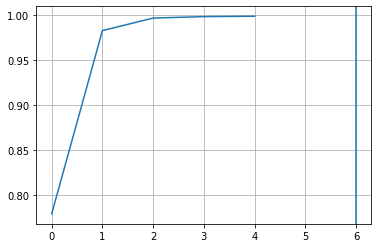

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(5)
pca.fit(X_train[c_float_and_int])
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.axvline(x=6)
plt.grid()

In [ ]:
X_train_pca_part = pd.DataFrame(pca.transform(X_train[c_float_and_int]))
X_val_pca_part = pd.DataFrame(pca.transform(X_val[c_float_and_int]))

In [ ]:
print(X_train_pca_part.isna().sum().sum())


0


In [ ]:
X_train_prepared = X_train_pca_part
#X_train_prepared[c_obj_to_model] =  X_train[c_obj_to_model].values
X_train_prepared[c_cat] =  X_train[c_cat].values
print(X_train_prepared .isna().sum().sum())


X_val_prepared = X_val_pca_part
#X_val_prepared[c_obj_to_model] =  X_val[c_obj_to_model] .values
X_val_prepared[c_cat] =  X_val[c_cat].values


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


0


In [ ]:
print(X_train_prepared.shape)
print(y_train.shape)

(413378, 358)
(413378,)


In [ ]:
X_train_prepared .isna().sum().sum()

0

In [ ]:
X_train_pca_part.shape

(413378, 5)

## Попытка применения Catboost

In [ ]:
!pip install -q catboost shap

     |████████████████████████████████| 76.1 MB 1.8 MB/s 
     |████████████████████████████████| 564 kB 48.4 MB/s 


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

model = CatBoostClassifier( task_type="GPU") 
model.fit(
    X_train_prepared, 
    y_train,  
    cat_features = c_cat,
    #text_features = c_obj_to_model
    ) 
y_pred = model.predict(X_val_prepared) 
print(f"{roc_auc_score(y_pred, y_val)}")
 

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.024203
0:	learn: 0.6514509	total: 608ms	remaining: 10m 7s
1:	learn: 0.6124761	total: 1.54s	remaining: 12m 47s
2:	learn: 0.5773092	total: 2.13s	remaining: 11m 47s
3:	learn: 0.5452572	total: 2.71s	remaining: 11m 14s
4:	learn: 0.5150909	total: 3.28s	remaining: 10m 53s
5:	learn: 0.4860795	total: 4.22s	remaining: 11m 39s
6:	learn: 0.4598052	total: 4.8s	remaining: 11m 21s
7:	learn: 0.4361482	total: 5.55s	remaining: 11m 27s
8:	learn: 0.4133540	total: 6.31s	remaining: 11m 35s
9:	learn: 0.3933616	total: 6.91s	remaining: 11m 24s
10:	learn: 0.3747656	total: 7.84s	remaining: 11m 45s
11:	learn: 0.3577740	total: 8.61s	remaining: 11m 48s
12:	learn: 0.3415253	total: 9.19s	remaining: 11m 37s
13:	learn: 0.3264181	total: 9.77s	remaining: 11m 27s
14:	learn: 0.3119636	total: 10.4s	remaining: 11m 20s
15:	learn: 0.2983461	total: 11s	remaining: 11m 13s
16:	learn: 0.2861036	total: 11.5s	remaining: 11m 7s
17:	learn: 0.2742576	total: 12.2s	remaining: 11m 3s
18:	learn: 0.2634746	total: 12.7

In [ ]:
print(f"{roc_auc_score(y_pred, y_val)}")


0.9472109211900297


## Загружаем  тестовый датасет

In [ ]:
%time raw_test_transactions = get_big_data_from_zip(path, file_test_transactions)
%time raw_test_identity = get_big_data_from_zip(path, file_test_identity)
test = pd.merge(raw_test_transactions, raw_test_identity, how = 'left', on = 'TransactionID')
X = test
del raw_test_transactions, raw_test_identity, test
gc.collect


CPU times: user 23 s, sys: 1.65 s, total: 24.6 s
Wall time: 24.5 s
CPU times: user 595 ms, sys: 29 ms, total: 624 ms
Wall time: 619 ms


<function gc.collect>

In [ ]:
del test
gc.collect()

NameError: ignored

In [ ]:

Y_ID = X['TransactionID']
X = X.drop('TransactionID', 1)
X = X.drop('TransactionDT', 1)
X = X.drop('DeviceType', 1)
X = X.drop('DeviceInfo', 1)

test_c_id = list(map(lambda c: c.replace("_","-"), c_id))
c_dict = dict(zip(test_c_id, c_id))
X = X.rename(columns = c_dict)

X_test  = prepare_data(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


C_ columns processing...
V_ columns processing...
id_ columns processing...
D_ columns processing...
M_ columns processing...
other object columns processing...
other float columns processing...


In [ ]:
X_test_pca_part = pd.DataFrame(pca.transform(X_test[c_float_and_int]))

X_test_prepared = X_test_pca_part
#XX_test_prepared[c_obj_to_model] =  X_val[c_obj_to_model] .values
X_test_prepared[c_cat] =  X_test[c_cat].values

Y_test_pred = model.predict(X_test_prepared)
submission = pd.DataFrame(columns=['TransactionID'], data= Y_ID)
submission[target] = Y_test_pred
submission.head()
submission.isFraud.value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


0    498595
1      8096
Name: isFraud, dtype: int64

### 3. Загрузка  тестовых значений

In [ ]:
submission.to_csv("submission.csv", index = False)

In [ ]:
!kaggle competitions submit -c ieee-fraud-detection -f "submission.csv" -m "one more time"

100% 4.83M/4.83M [00:00<00:00, 16.1MB/s]
Successfully submitted to IEEE-CIS Fraud Detection